In [1]:
#importing dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime
#from datetime import timedelta
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
#connecting to sql hawaii database
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#select date column from measurment table and orderby the dates in desc order so the latest date is first
session.query(Measurement.date).order_by(Measurement.date.desc()).all()

#show the first date in the query results this is your last date
results = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
results

#create a variable for your final date, this will be used in future queries
finaldate = results[(0)]
finaldate

# Calculate the date 1 year ago from the last data point in the database
lastyear = dt.datetime.strptime(finaldate,'%Y-%m-%d') - dt.timedelta(days=365)
lastyeardate = lastyear.date()
lastyeardate

#Now that you have the actual date, change the date format 
formated = dt.date(2016,8,23)

#format a year ago date to str / text so that the query runs
c = str(formated)[:10]
c
 
# Perform a query to retrieve the data and precipitation scores
#selecting date and prcp columns from Measurement table, filtering off of any date greater than or equal to the date a year prior from last date
prcpscores = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=c).all()
prcpscores



[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

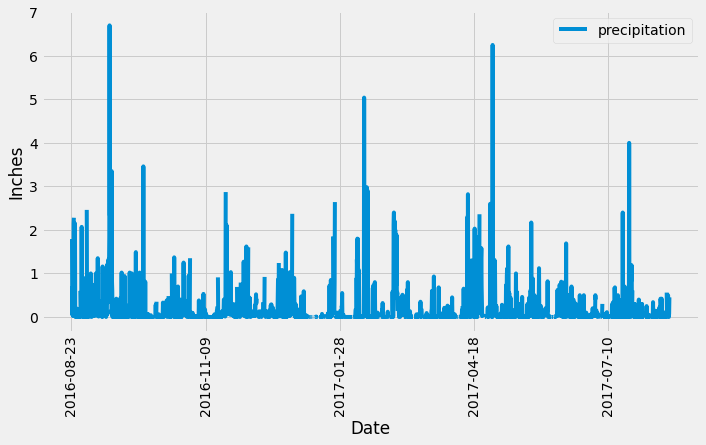

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcpscores, columns=["date","precipitation"])
df.set_index("date",inplace=True)
#df

# Sort the dataframe by date
prcpdf = df.sort_index(ascending=True)
prcpdf

# Use Pandas Plotting with Matplotlib to plot the data

prcpdf.plot(use_index=True,label="precipitation",figsize=(10.5,5.5))
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Inches")
plt.legend()

plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpdf.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
b = session.query(func.count(Station.station)).all()
b

[(9)]

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station).all()

#create a query that selections stations from the measurement table, then counts those stations 
#after groupinb by the station, then order the counts in desc order
x = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

x

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#find most active station by tweaking previous query slightly to show first station
mostactive=session.query(Measurement.station,func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).first()
mostactive

#create a station variable for most active station
most_active_station = mostactive[(0)]
most_active_station 


#Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries.
#create a query that selects tobs from the Measurement table and finds min,max, and avg then filter to only find that data for specificied most active station 


session.query(Measurement.station,Measurement.tobs)
most_active_info=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                      filter(Measurement.station==most_active_station).all()
most_active_info


[(54.0, 85.0, 71.66378066378067)]

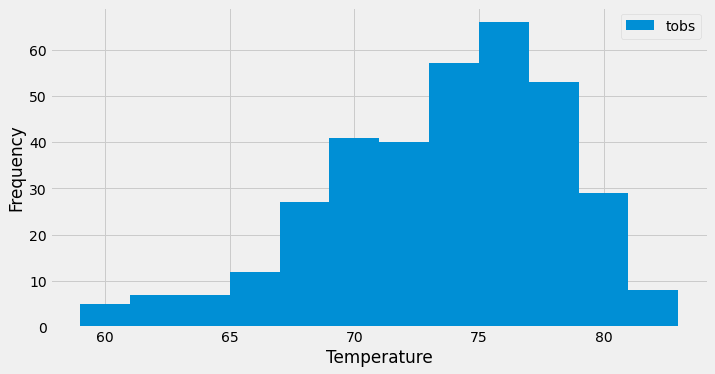

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.station,Measurement.date,Measurement.tobs)

#create a query that selects the station, date,and tobs from the measurement table, get this data for the most active station by filtering
#then find only the data from you date a year ago or more recent.
most_active_temps = session.query(Measurement.station,Measurement.date,Measurement.tobs).\
    filter(Measurement.station==most_active_station).\
    filter(Measurement.date>=c).\
    order_by((Measurement.tobs).desc()).all()
most_active_temps

#create a data frame of your temp query results for the most active station
most_active_tempsDF = pd.DataFrame(most_active_temps)
most_active_tempsDF

#plot
most_active_tempsDF.plot.hist(bins=12,label="tobs",figsize=(10.5,5.5))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()

plt.show()

## Bonus Challenge Assignment

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [19]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [20]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [21]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

ProgrammingError: (psycopg2.errors.UndefinedFunction) function strftime(unknown, text) does not exist
LINE 3: WHERE strftime('%m-%d', measurement.date) = '01-01'
              ^
HINT:  No function matches the given name and argument types. You might need to add explicit type casts.

[SQL: SELECT min(measurement.tobs) AS min_1, avg(measurement.tobs) AS avg_1, max(measurement.tobs) AS max_1 
FROM measurement 
WHERE strftime(%(strftime_1)s, measurement.date) = %(strftime_2)s]
[parameters: {'strftime_1': '%m-%d', 'strftime_2': '01-01'}]
(Background on this error at: http://sqlalche.me/e/13/f405)

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
